In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-data/student_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/student-performance-data/student_data.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.shape

(395, 33)



This indicates that we have **395 observations (rows)** and **33 features (columns)**.

Understanding the shape is essential as it gives an initial sense of the dataset's scale and complexity, guiding how we approach univariate, bivariate, and multivariate analysis.

---

### Exploratory Data Analysis (EDA) Approach:
- **Univariate Analysis**: Focused on individual feature distributions (e.g., histograms, boxplots) to understand skewness, outliers, and value ranges.
- **Bivariate Analysis**: Explored relationships between target variable and single features (e.g., scatter plots, bar plots).
- **Multivariate Analysis**: Investigated interactions between multiple features simultaneously (e.g., correlation heatmaps, pairplots).

During EDA, we critically evaluated every visualization and retained only the plots that provided meaningful insights into the data.

Additionally, we introduced **two extra visualizations** to deepen our understanding of specific patterns and relationships within the dataset.

These steps ensure that the dataset is well-understood before moving into model building and evaluation phases.

In [4]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df["G_AVG"] = df[["G1","G2","G3"]].mean(axis = 1)

### Combining G1, G2, and G3 into G_AVG

The features **G1**, **G2**, and **G3** represent student grades from different assessment periods (e.g., Term 1, Term 2, and Final Exam).

Upon analyzing their distributions, we observed that:
- They exhibit **almost identical patterns**.
- They share **similar ranges**.
- There were **no significant unique differences** between them.

Visualizing each of these grades separately against every other independent variable would lead to **redundant and repetitive plots**, which do not add meaningful new insights.

---

### Why Create G_AVG?

To streamline our analysis and avoid unnecessary clutter, we created a new feature:

$$
G\_AVG = \frac{G1 + G2 + G3}{3}
$$

This allows us to:
- **Simplify visualizations** by focusing on a single aggregated performance metric.
- **Preserve the overall academic performance** of students across all terms.
- **Reduce redundancy** without losing valuable information.

This approach makes our visual exploration and modeling process **cleaner, faster, and more efficient**.


<Axes: xlabel='Mjob', ylabel='G_AVG'>

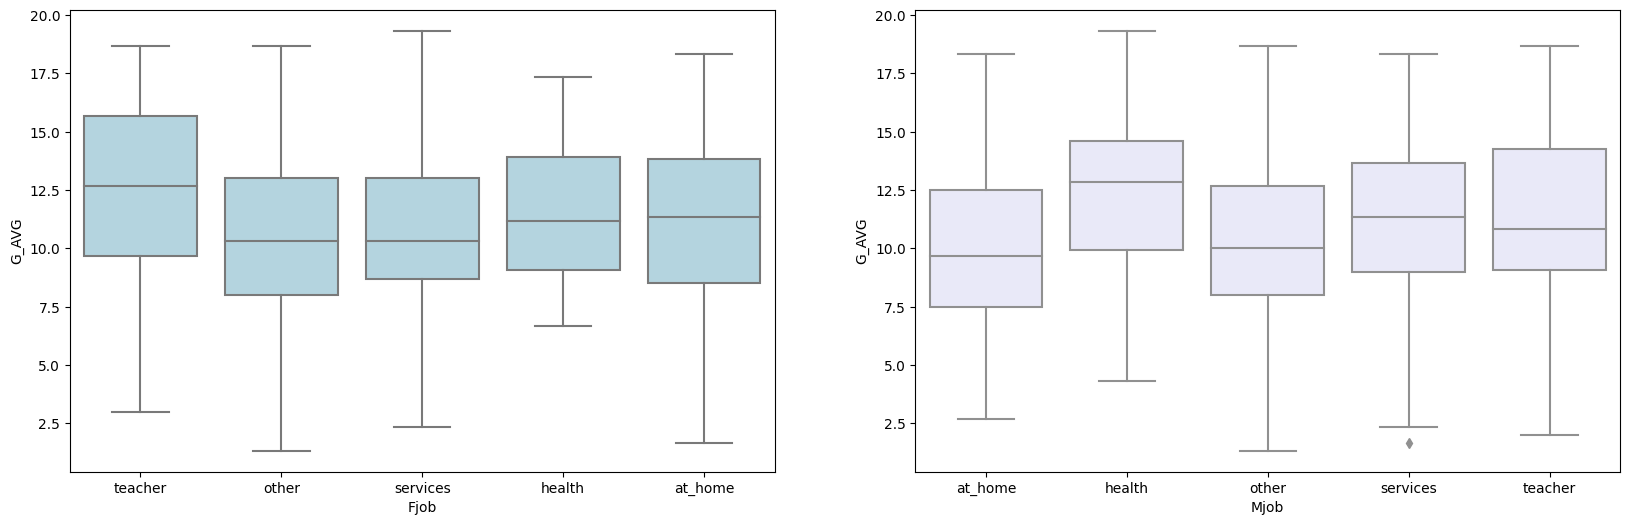

In [7]:
#Categorical
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(df, x="Fjob",y="G_AVG", color="lightblue")
plt.subplot(1,2,2)
sns.boxplot(df, x="Mjob",y="G_AVG", color="lavender")

**Students whose parents are teachers or health workers tend to have slightly better average grades, while those in services, other, or at_home roles show lower medians and more variability.**

<Figure size 2500x2000 with 0 Axes>

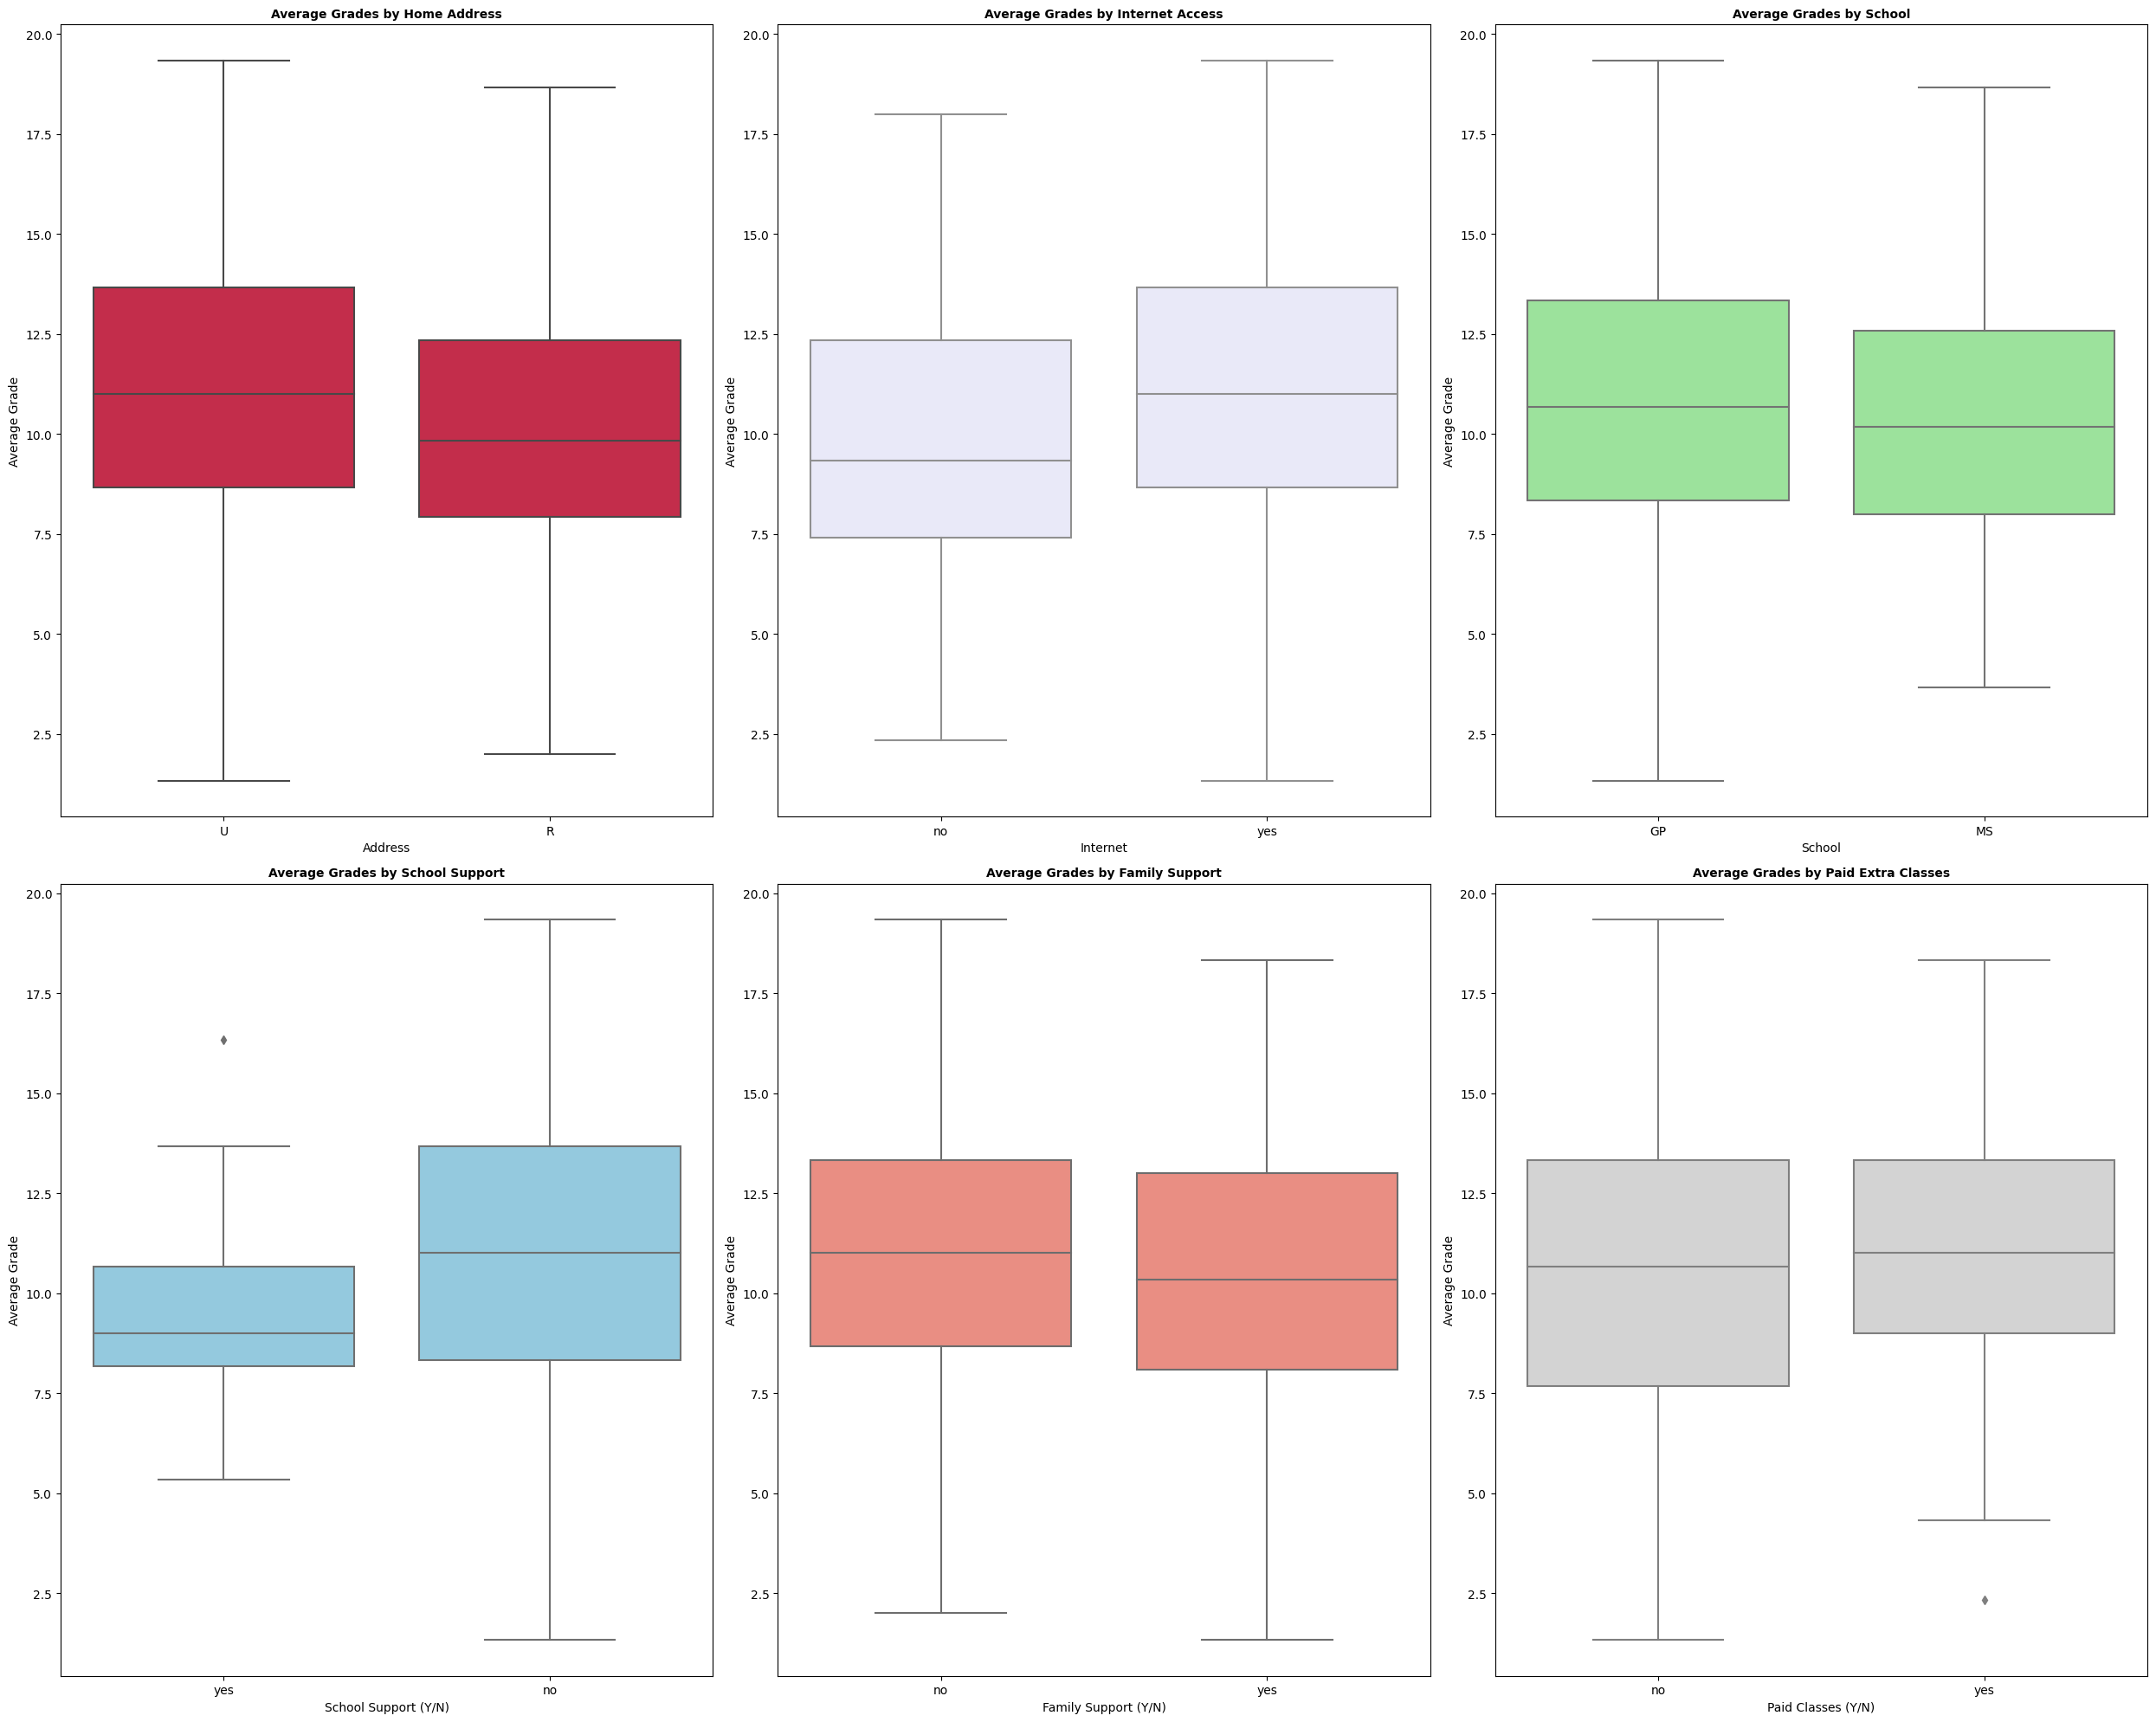

In [8]:
#Categorical v Numeric
plt.figure(figsize=(25, 20))

plt.figure(figsize=(25, 20))

# Row 1
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x="address", y="G_AVG", color="#DC143C")
plt.title("Average Grades by Home Address", fontweight="bold", fontsize=10)
plt.xlabel("Address")
plt.ylabel("Average Grade")

plt.subplot(2, 3, 2)
sns.boxplot(data=df, x="internet", y="G_AVG", color="lavender")
plt.title("Average Grades by Internet Access", fontweight="bold", fontsize=10)
plt.xlabel("Internet")
plt.ylabel("Average Grade")

plt.subplot(2, 3, 3)
sns.boxplot(data=df, x="school", y="G_AVG", color="lightgreen")
plt.title("Average Grades by School", fontweight="bold", fontsize=10)
plt.xlabel("School")
plt.ylabel("Average Grade")

# Row 2
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x="schoolsup", y="G_AVG", color="skyblue")
plt.title("Average Grades by School Support", fontweight="bold", fontsize=10)
plt.xlabel("School Support (Y/N)")
plt.ylabel("Average Grade")

plt.subplot(2, 3, 5)
sns.boxplot(data=df, x="famsup", y="G_AVG", color="salmon")
plt.title("Average Grades by Family Support", fontweight="bold", fontsize=10)
plt.xlabel("Family Support (Y/N)")
plt.ylabel("Average Grade")

plt.subplot(2, 3, 6)
sns.boxplot(data=df, x="paid", y="G_AVG", color="lightgray")
plt.title("Average Grades by Paid Extra Classes", fontweight="bold", fontsize=10)
plt.xlabel("Paid Classes (Y/N)")
plt.ylabel("Average Grade")

plt.tight_layout()
plt.show()

### Internet access and urban location have higher average grades, while school differences are minor
### Students receiving school support appear to be struggling more academically.
### Family support doesn’t show a strong effect on grades in this sample.
### Paying for extra classes doesn't show a clear advantage in grades.


<Axes: xlabel='failures', ylabel='G_AVG'>

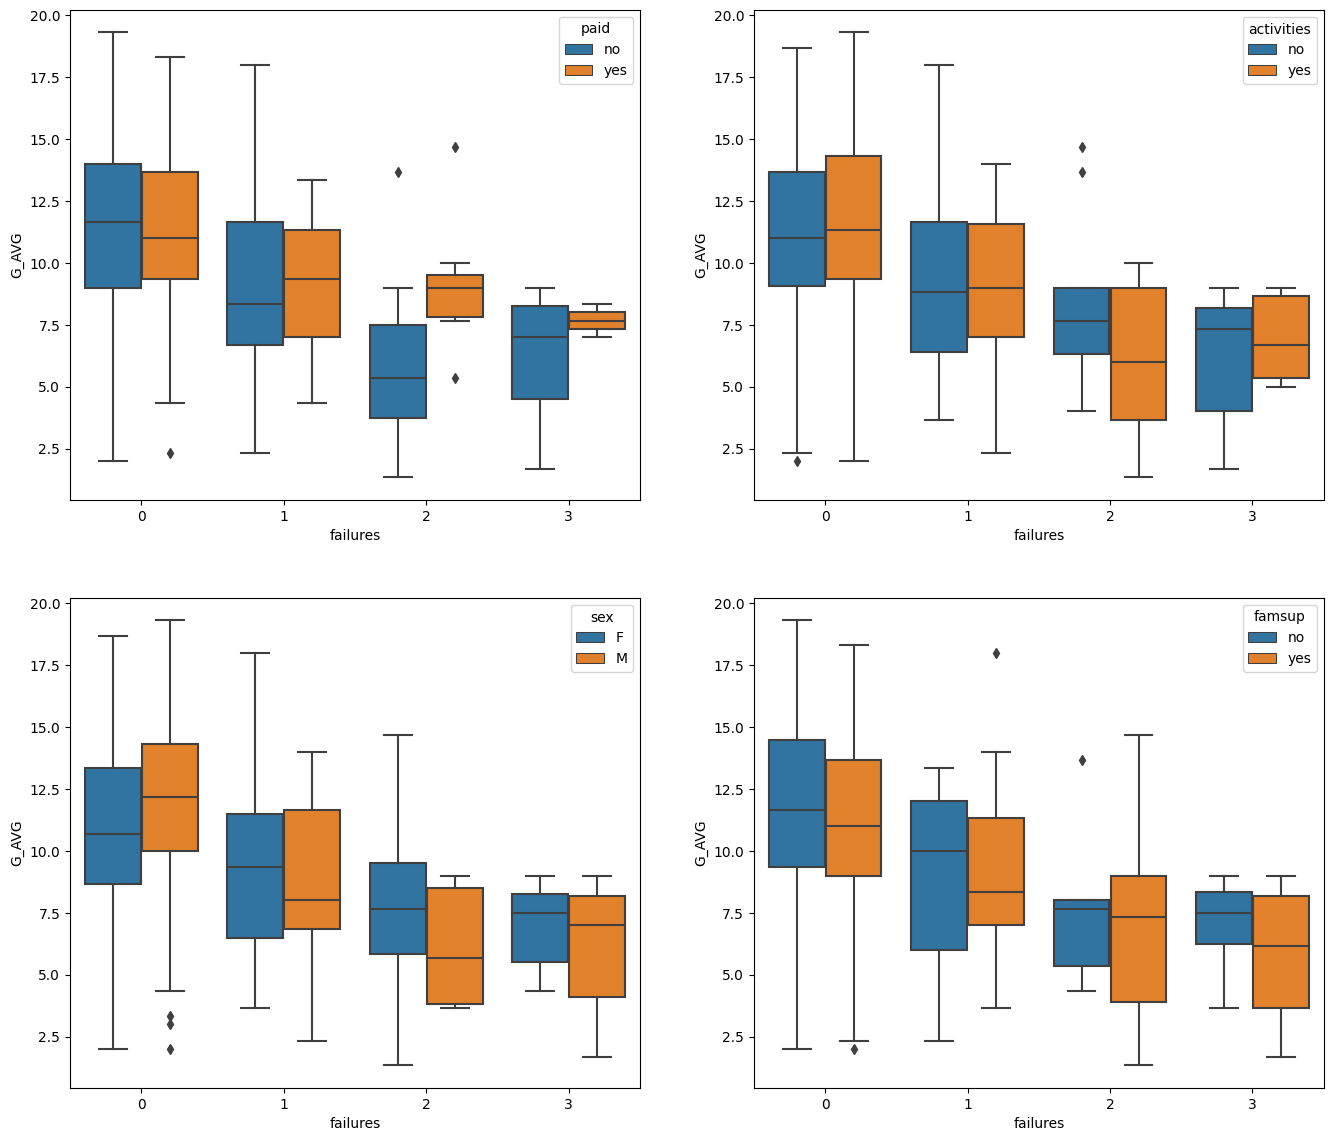

In [9]:
plt.figure(figsize=(25,14))
plt.subplot(2,3,1)
sns.boxplot(data=df, x='failures', y='G_AVG', hue='paid')

plt.subplot(2,3,2)
sns.boxplot(data=df, x='failures', y='G_AVG', hue='activities')


plt.subplot(2,3,4)
sns.boxplot(data=df, x='failures', y='G_AVG', hue='sex')
plt.subplot(2,3,5)
sns.boxplot(data=df, x='failures', y='G_AVG', hue='famsup')

### Paid classes do not appear to offset the negative impact of repeated failure.
### Activities may support performance only in students who are already doing okay.
### Gender seems to make a small difference at 0 failures, but once students begin to fail, academic struggle is equal across genders.
### Family support may offer some benefit early on, but it doesn’t appear to prevent performance decline in students with multiple failures.

Text(0, 0.5, 'Average Score')

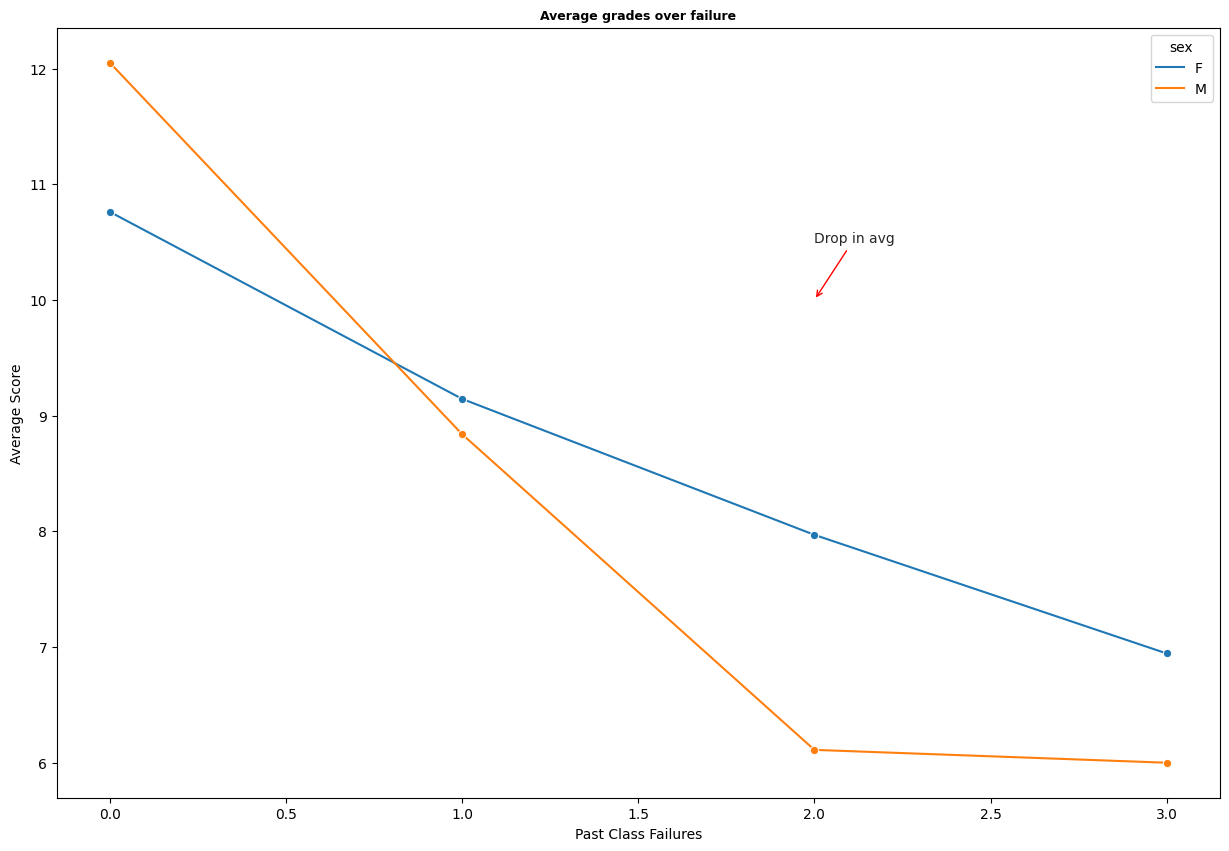

In [10]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x="failures", y="G_AVG", marker="o", errorbar=None, hue="sex")
sns.set_style("ticks")
plt.annotate("Drop in avg", xy=(2, 10), xytext=(2, 10.5),
             arrowprops=dict(arrowstyle="->", color='red'))
plt.title("Average grades over failure", fontsize= 9, fontweight= "bold")
plt.xlabel("Past Class Failures")
plt.ylabel("Average Score")

### The more a student has failed in the past, the lower their average grades become. While males initially outperform females, their performance declines more rapidly after repeated failures.

In [11]:
def skew(df, columns):
    for col in columns:
        skew_val = df[col].skew()
        kurt_val = df[col].kurtosis()

        # Skewness interpretation
        if skew_val < -1:
            skewtype = "Highly Negatively Skewed"
        elif -1 <= skew_val < -0.5:
            skewtype = "Moderately Negatively Skewed"
        elif -0.5 <= skew_val <= 0.5:
            skewtype = "Symmetrical"
        elif 0.5 < skew_val <= 1:
            skewtype = "Moderately Positively Skewed"
        else:
            skewtype = "Highly Positively Skewed"

        # Kurtosis interpretation
        if kurt_val < 3:
            kurttype = "Platykurtic"
        elif kurt_val == 3:
            kurttype = "Mesokurtic"
        else:
            kurttype = "Leptokurtic"

        print(f"\nColumn: {col}")
        print(f"  Skewness: {skew_val:.2f} → {skewtype}")
        print(f"  Kurtosis: {kurt_val:.2f} → {kurttype}")

skew(df, ["G1","G2","G3","absences"])



Column: G1
  Skewness: 0.24 → Symmetrical
  Kurtosis: -0.69 → Platykurtic

Column: G2
  Skewness: -0.43 → Symmetrical
  Kurtosis: 0.63 → Platykurtic

Column: G3
  Skewness: -0.73 → Moderately Negatively Skewed
  Kurtosis: 0.40 → Platykurtic

Column: absences
  Skewness: 3.67 → Highly Positively Skewed
  Kurtosis: 21.72 → Leptokurtic


### Univariate

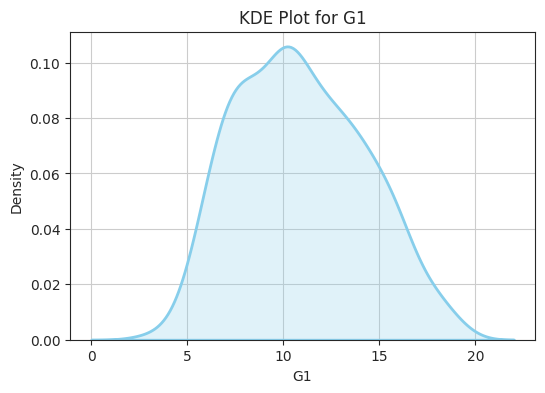

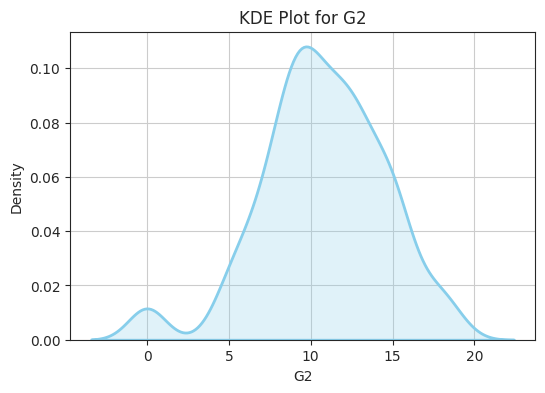

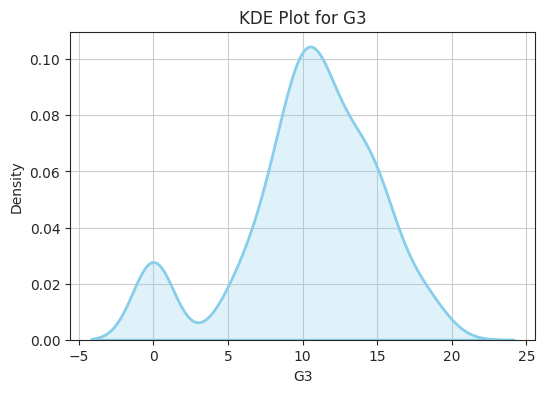

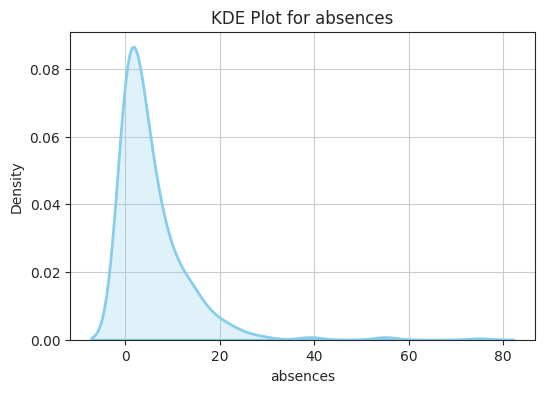

In [12]:
def plot_kde(df, columns):
    for col in columns:
        plt.figure(figsize=(6, 4))
        sns.kdeplot(data=df[col], fill=True, color='skyblue', linewidth=2)
        plt.title(f"KDE Plot for {col}")
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.grid(True)
        plt.show()
plot_kde(df, ["G1", "G2", "G3","absences"])

### Log Transformation of Absences

During our exploratory analysis, we observed that the **Absences** feature was **highly positively skewed**. The majority of students had very few absences, while a small number had extremely high absence counts, resulting in a long right tail in the distribution.

---

### Why Log Transform Absences?

We applied a **logarithmic transformation** to Absences to address the following issues:

1. **Reduce Skewness**  
   The extreme values (outliers) in Absences heavily distorted the distribution. Applying log transformation compresses these large values, making the distribution more symmetric and manageable.

2. **Handle Long Tails**  
   Features with long tails can mislead visualizations and model interpretations. Log transformation shortens these tails, giving a clearer picture of the data's central tendency.

---

### Formula Applied:
$$
\text{Absences\_log} = \ln(1 + \text{Absences})
$$

---

This transformation significantly improved the interpretability of Absences in both visualizations and modeling.


In [13]:
#LogTransforming absences
df["absences_log"] = np.log1p(df["absences"])
df["log_G3"] = np.log1p(df["G3"])

In [14]:
#Dealing with numerical variables
numeric_col = df.select_dtypes(include="number")

<Axes: >

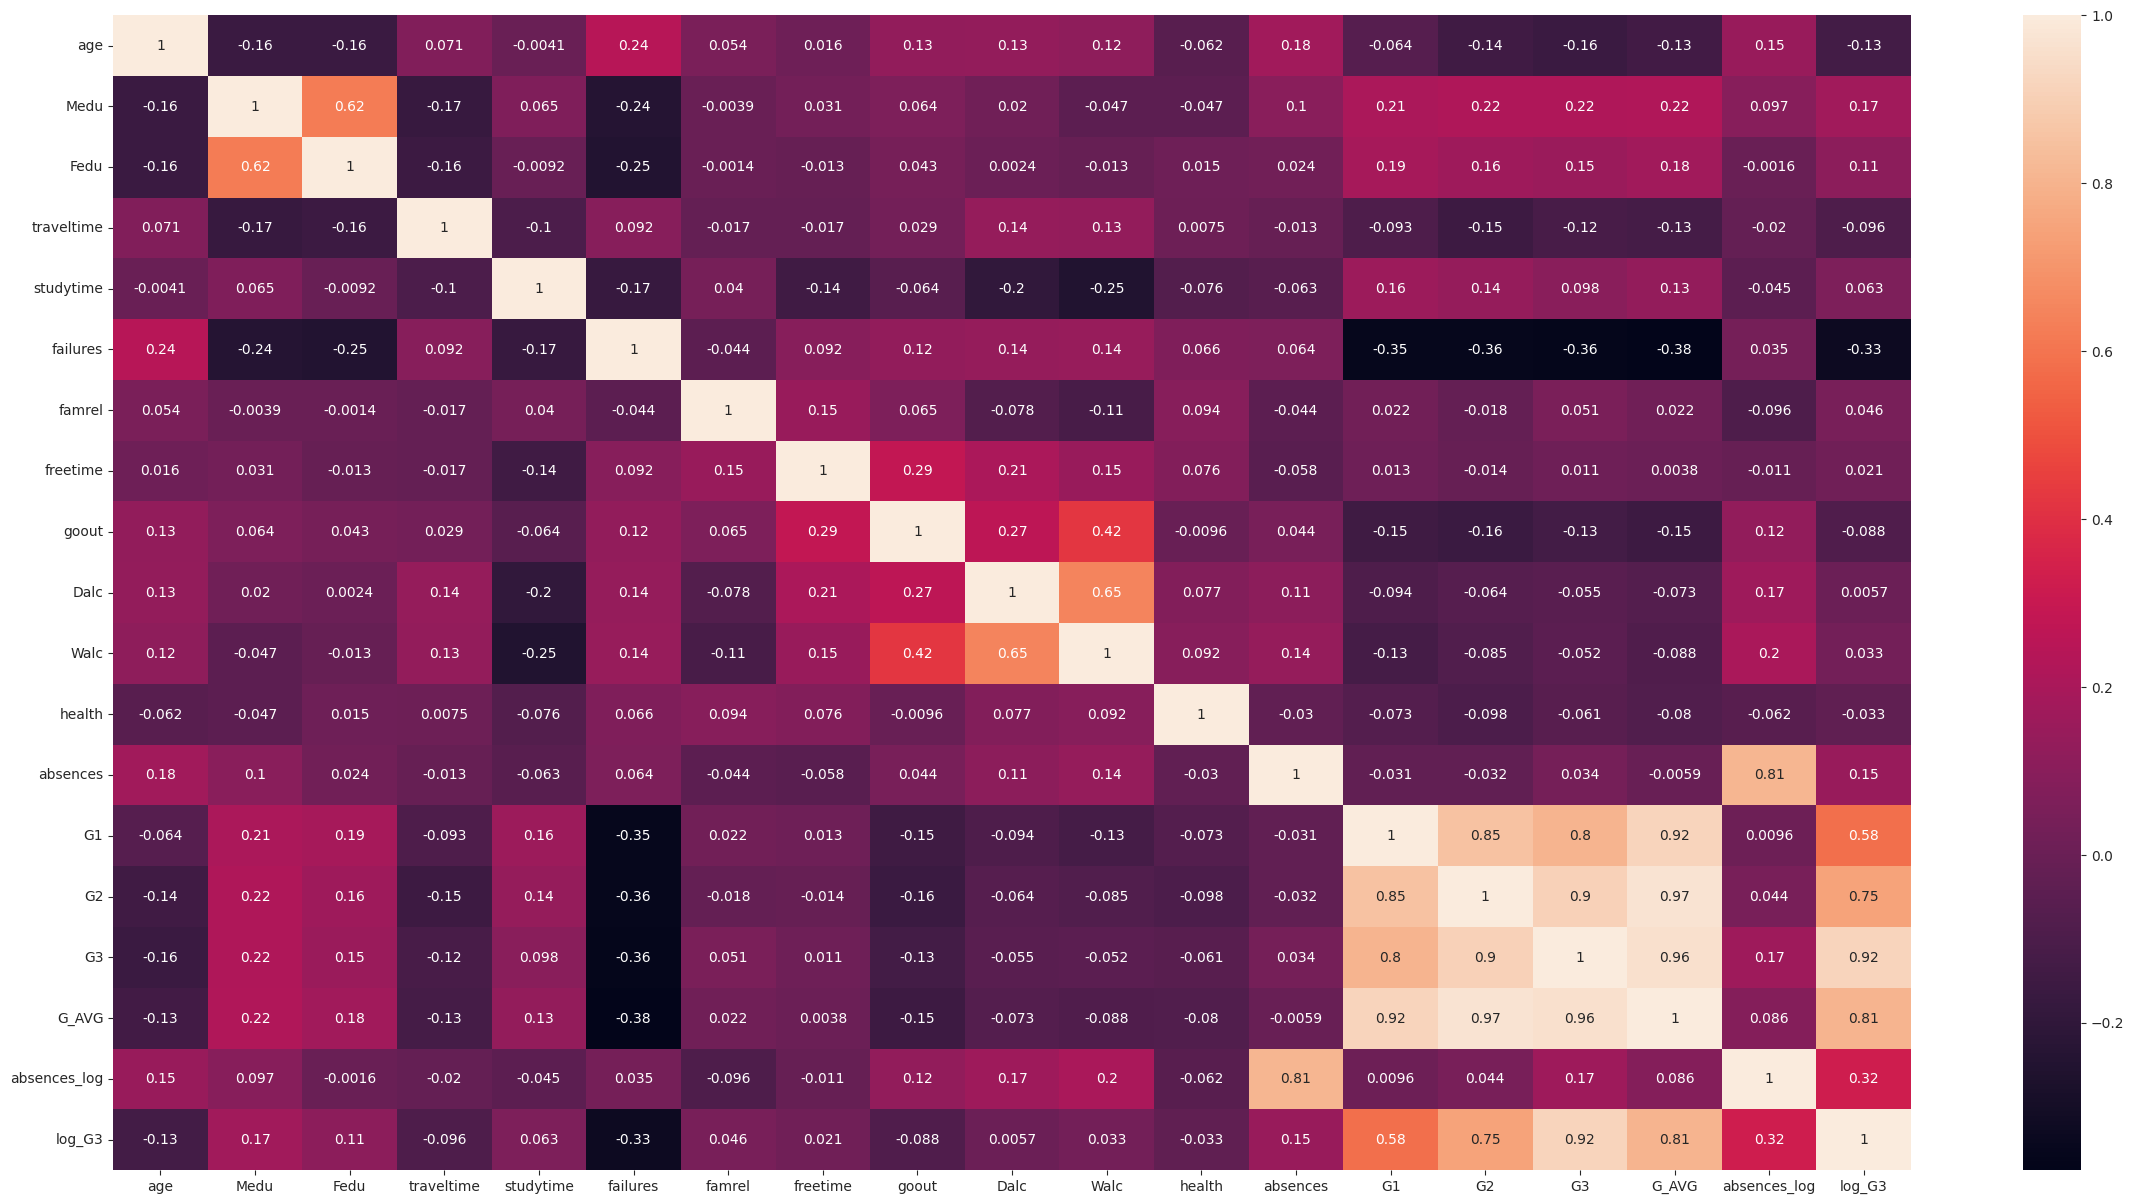

In [15]:
num_corr = numeric_col.corr()
plt.figure(figsize=(29,15))
sns.heatmap(num_corr, annot=True)

In [16]:
features = df[["G1","G2","absences_log"]]
target = df["G3"]
x = features
y = target

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)
Model = LinearRegression()
Model.fit(x_train, y_train)

LinearRegression()

### Multiple Linear Regression
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \dots + \beta_n X_n + \epsilon
$$


In [17]:
y_pred = Model.predict(x_test)

In [18]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

R2: 0.8198694690450072
MSE: 3.9596407541782233
MAE: 1.3086087897832963
RMSE: 1.9898846082570274


### Log transformation of absences led to an improvement of approximately 0.008 in the model's performance

In [19]:
student_Rein = np.array([[13,12,2]])
predict_rein_grade  = Model.predict(student_Rein)
print(f"Student Predicted Grade {predict_rein_grade}")

Student Predicted Grade [12.3533351]


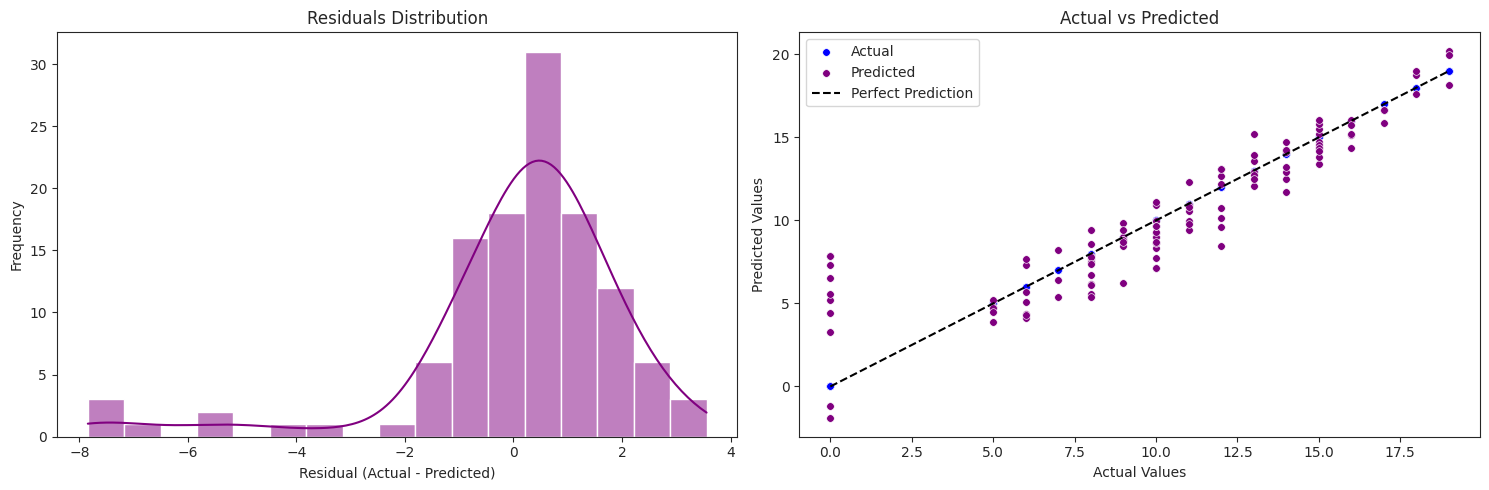

In [20]:
# Assuming y_test and y_pred are defined
residual = y_test - y_pred

plt.figure(figsize=(15, 5))

# --- Subplot 1: Residual Histogram ---
plt.subplot(1, 2, 1)
sns.histplot(residual, kde=True, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')

# --- Subplot 2: Actual vs Predicted Scatter (Diagonal) ---
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual', s=30)
sns.scatterplot(x=y_test, y=y_pred, color='purple', label='Predicted', s=30)

# Perfect Prediction Reference Line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=400)
# Train (fit) the model on training data
rf_model.fit(x_train, y_train)
# Predict on test data
rf_pred = rf_model.predict(x_test)



In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute R² and RMSE for Random Forest
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)

print(f"Random Forest R² Score: {rf_r2:.4f}")
print(f"Random Forest RMSE: {rf_rmse:.4f}")

Random Forest R² Score: 0.8624
Random Forest RMSE: 1.7389


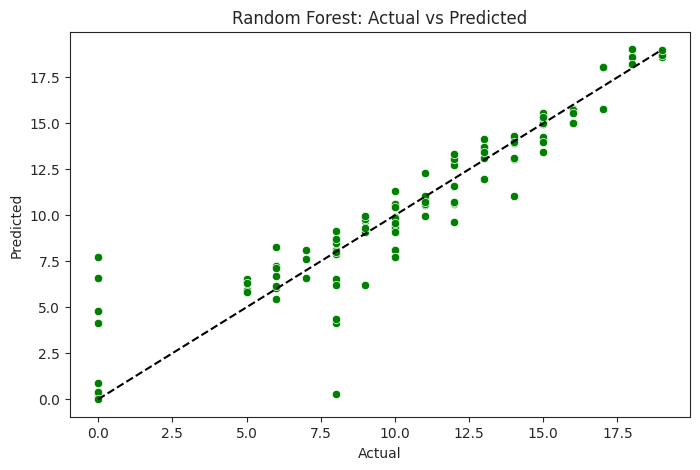

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=rf_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')
plt.show()